In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('titanic_grupo2.csv')

df.head()
df.drop("Unnamed: 0", axis=1, inplace=True)

In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Faixa Etarira
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,"(15, 25]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,"(25, 60]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,"(25, 60]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,"(25, 60]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,"(25, 60]"


# MODELAGEM

- Testar modelos
- Avaliar modelos

kNN - k-Nearest Neighbors

In [7]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
variaveis_que_nao_vamos_usar = ['Name', 'Ticket']

df_limpo = df.drop(variaveis_que_nao_vamos_usar, axis=1)

In [28]:
df_limpo

# tratar sexo

# df['Sex'].apply(lambda x: 1 if x == 'male' else 0)

def trata_genero(genero):

    return 1 if genero == 'male' else 0


df_limpo['Sex'] = df_limpo['Sex'].apply(trata_genero)

In [29]:
def trata_embarked(embarked):

    if embarked == 'S':
        return 1
    return 2 if embarked == 'C' else 3


df_limpo['Embarked'] = df_limpo['Embarked'].apply(trata_embarked)

In [33]:
df_limpo.set_index("PassengerId", inplace=True)

In [30]:
def trata_faixa_etaria(faixa):

    faixas = df_limpo['Faixa Etarira'].value_counts().index

    if faixa == '(0, 15]':
        return 1
    if faixa == '(15, 25]':
        return 2
    return 3 if faixa == '(25, 60]' else 4

df_limpo['Faixa Etarira'] = df_limpo['Faixa Etarira'].apply(trata_faixa_etaria)

In [24]:
df_limpo['Faixa Etarira'].value_counts().index

Index(['(25, 60]', '(15, 25]', '(0, 15]', '(60, 100]'], dtype='object')

In [34]:
df_limpo.dtypes

Survived           int64
Pclass             int64
Sex                int64
Age              float64
SibSp              int64
Parch              int64
Fare             float64
Embarked           int64
Faixa Etarira      int64
dtype: object

In [36]:
# perform knn classifier

knn = KNeighborsClassifier(n_neighbors=3)

X = df_limpo.drop("Survived", axis=1)
y = df_limpo['Survived']

KNeighborsClassifier(n_neighbors=3)

In [51]:
#treino e teste

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [54]:
X_test.iloc[3:4]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Faixa Etarira
PassengerId,,,,,,,,
721,2,0,6.0,0,1,33.0,1,1


In [55]:
knn.predict(X_test.iloc[3:4])

array([0], dtype=int64)

In [56]:
y_test.iloc[3:4]

PassengerId
721    1
Name: Survived, dtype: int64

In [63]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [58]:
# confusion matrix

confusion_matrix(y_test, knn.predict(X_test))

array([[86, 19],
       [41, 33]], dtype=int64)

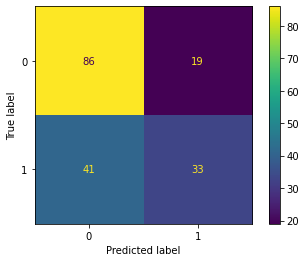

In [68]:
import matplotlib.pyplot as plt

# fig, ax = plt.figure(figsize=(12,8))
plot_confusion_matrix(knn, X_test, y_test, display_labels=['0', '1'])

In [59]:
df_limpo['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [62]:
print(classification_report(y_test, knn.predict(X_test)))

              precision    recall  f1-score   support

           0       0.68      0.82      0.74       105
           1       0.63      0.45      0.52        74

    accuracy                           0.66       179
   macro avg       0.66      0.63      0.63       179
weighted avg       0.66      0.66      0.65       179



In [73]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

dtree = DecisionTreeClassifier()

dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [70]:
print(classification_report(y_test, dtree.predict(X_test)))

              precision    recall  f1-score   support

           0       0.71      0.81      0.76       105
           1       0.67      0.54      0.60        74

    accuracy                           0.70       179
   macro avg       0.69      0.68      0.68       179
weighted avg       0.69      0.70      0.69       179



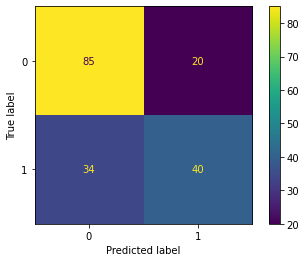

In [71]:
plot_confusion_matrix(dtree, X_test, y_test, display_labels=['0', '1'])

In [ ]:
# visualize tree

plot_tree(dtree, feature_names=X_train.columns, class_names=['0', '1'], filled=True);

In [77]:
from sklearn.ensemble import RandomForestClassifier

In [83]:
rf = RandomForestClassifier(n_estimators=1000, class_weight='balanced')

rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=1000)

In [84]:
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.75      0.78      0.77       105
           1       0.67      0.64      0.65        74

    accuracy                           0.72       179
   macro avg       0.71      0.71      0.71       179
weighted avg       0.72      0.72      0.72       179



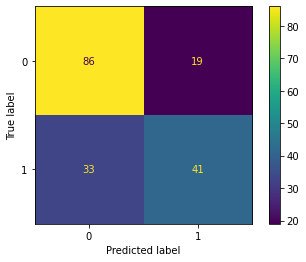

In [80]:
plot_confusion_matrix(rf, X_test, y_test, display_labels=['0', '1'])

In [85]:
# feature importance

pd.DataFrame({'importances':rf.feature_importances_, 'features':X_train.columns})

,importances,features
0,0.088902,Pclass
1,0.000000,Sex
2,0.320364,Age
3,0.068329,SibSp
4,0.047748,Parch
5,0.390461,Fare
6,0.043793,Embarked
7,0.040403,Faixa Etarira


In [86]:
#regressao logistica

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [87]:
print(classification_report(y_test, lr.predict(X_test)))

              precision    recall  f1-score   support

           0       0.72      0.87      0.78       105
           1       0.73      0.51      0.60        74

    accuracy                           0.72       179
   macro avg       0.72      0.69      0.69       179
weighted avg       0.72      0.72      0.71       179



In [91]:
df_limpo['Embarked']

PassengerId
1      1
2      2
3      1
4      1
5      1
      ..
887    1
888    1
889    1
890    2
891    3
Name: Embarked, Length: 891, dtype: int64

In [104]:
df_limpo

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Faixa Etarira
PassengerId,,,,,,,,,
1,0,3,0,22.0,1,0,7.2500,1,2
2,1,1,0,38.0,1,0,71.2833,2,3
3,1,3,0,26.0,0,0,7.9250,1,3
4,1,1,0,35.0,1,0,53.1000,1,3
5,0,3,0,35.0,0,0,8.0500,1,3
...,...,...,...,...,...,...,...,...,...
887,0,2,0,27.0,0,0,13.0000,1,3
888,1,1,0,19.0,0,0,30.0000,1,2
889,0,3,0,28.0,1,2,23.4500,1,3


In [107]:
categorical_cols = ['Embarked', 'SibSp', 'Parch', 'Faixa Etarira'] 

#import pandas as pd
df_limpo_dummies = pd.get_dummies(df_limpo, columns = categorical_cols)

In [120]:
#OneHotEncoder

In [110]:
df_limpo_dummies.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked_1', 'Embarked_2',
       'Embarked_3', 'SibSp_0', 'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4',
       'SibSp_5', 'SibSp_8', 'Parch_0', 'Parch_1', 'Parch_2', 'Parch_3',
       'Parch_4', 'Parch_5', 'Parch_6', 'Faixa Etarira_1', 'Faixa Etarira_2',
       'Faixa Etarira_3', 'Faixa Etarira_4'],
      dtype='object')

In [116]:
X_train_dummies, X_test_dummies, y_train_dummies, y_test_dummies = train_test_split(df_limpo_dummies.drop("Survived", 1), df_limpo_dummies['Survived'], test_size=0.2, random_state=42)

C:\Users\Admin\AppData\Local\Temp/ipykernel_8416/3428299666.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_train_dummies, X_test_dummies, y_train_dummies, y_test_dummies = train_test_split(df_limpo_dummies.drop("Survived", 1), df_limpo_dummies['Survived'], test_size=0.2, random_state=42)


In [117]:
rf.fit(X_train_dummies, y_train_dummies)

RandomForestClassifier(class_weight='balanced', n_estimators=1000)

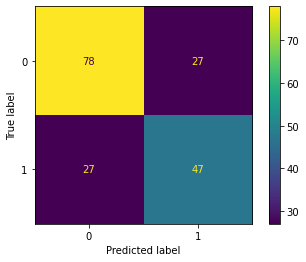

In [118]:
plot_confusion_matrix(rf, X_test_dummies, y_test_dummies, display_labels=['0', '1'])

In [119]:
print(classification_report(y_test_dummies, rf.predict(X_test_dummies)))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74       105
           1       0.64      0.64      0.64        74

    accuracy                           0.70       179
   macro avg       0.69      0.69      0.69       179
weighted avg       0.70      0.70      0.70       179



In [ ]:
# grid search
# random search

# hyperparameter tuning

# cross-validation (k-fold)